In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 

- Compute a numerical solution, using second order approximation for both partial derivatives and initial data

$$g(x) = e^{-300(x-0.5)^2}$$

Use the following parameters: $\Delta x= \Delta t = 0.001$, $c=1$. Plot the solution at every $0.25$ units of time from $t=0$ to $t=1.5$.


In [4]:
#funcion definition
g = lambda x: np.exp( -300*((x -0.5)**2) )

## solution method implementation

We have to start by building our discrete mesh which ilustrates the space-time grid where we will be working on.

In this case we discretize the time and space domain as follows:

\begin{align}
\vec{x}\ &=\ <0,\quad 1\Delta x,\quad 2\Delta x,\quad...\quad, i\Delta x,\quad ...\quad ,xend> \quad i=0,1,...,N_{x}\\
\vec{t}\ &=\ <0,\quad 1\Delta t,\quad 2\Delta t,\quad...\quad, i\Delta t,\quad ...\quad ,tend> \quad i=0,1,...,N_{t}
\end{align}


In [5]:
def solution_method(xend: float,
                        tend: float,
                        xstart = 0, 
                        tstart = 0,
                        dx = 0.001,
                        dt = 0.001, 
                        c  = 1):
    
    #span of time and space
    timespan  = np.arange(start = tstart, stop = tend + dt, step = dt)
    spacespan = np.arange(start = xstart, stop = xend + dx, step = dx)

    
    #number of elements in the time and space span
    Nx = len(spacespan)
    Nt = len(timespan)
    
    #some function relevant contstans
    sigma = c*dx/dt
    
    # Initialize solution matrix  
    X, Y = np.meshgrid(spacespan, timespan)
    


solution_method(xend = 1, tend = 1.5)

In [110]:
def solve_wave_eqn_v0(c:      float,
                   g:      callable,
                   startt: float, 
                   startx: float,
                   endt:   float, 
                   endx:   float,
                   dt:     float, 
                   dx:     float,) -> np.ndarray:
    
    """
    Solves the wave equation u_tt - c^2 u_xx = 0 with Dirichlet boundary conditions
    using the finite difference method with second order centered difference approximations. 
    
    Parameters:
        - c (float):    the wave speed.
        - g (callable): the initial condition function, which takes a 1D NumPy array x and
                        returns a 1D NumPy array of the same shape as x.
        - startt (float): the start time of the simulation.
        - startx (float): the start position of the simulation.
        - endt (float):   the end time of the simulation.
        - endx (float):   the end position of the simulation.
        - dt (float):     the time step size.
        - dx (float):     the position step size.
        
    Returns:
        - U (ndarray):    a 2D NumPy array of shape (M+1, N+2) containing the numerical solution
                          U_ij at each grid point (x_j, t_i).
                          
    Plots:
        - A 3D surface plot of the numerical solution U_ij at each grid point (x_j, t_i).
    """
    
    # Compute the number of time and position steps
    N = int((endx - startx) / dx)
    M = int((endt - startt) / dt)
    
    #time and space discretization
    x = np.linspace(startx, endx, N+2) #include boundary points
    t = np.linspace(startt, endt, M+1) #include boundary points

    
    #numerical solution, where each row is a instant of time
    #and each column in the row is a corresponding space position
    U   = np.zeros((M+1, N+2))
    
    #constant for computing U
    cte = (c**2)*(dt**2)/(dx**2)
    
    # set initial conditions
    U[0, 1:N+1] = 0                           # - at time zero, the wave is zero
    U[1, 1:N+1] = U[0,1:N+1] + dt*g(x[1:N+1]) # - at the next instant of time
                                              #   there is a speed given by g(x)
    
    # apply boundary conditions for the space 
    #(that is zeros on both extremes of the space)
    U[:, 0]   = 0
    U[:, N+1] = 0
    
    # compute numerical solution
    for n in range(1, M):
        for j in range(1, N+1):
            
            #apply our rearanged formula to get the wave on the next 
            #time instant
            U[n+1,j] = 2*U[n,j] - U[n-1,j] +  (cte * (U[n,j-1] - 2*U[n,j] + U[n,j+1]))
        
        # The following two lines set the boundary conditions for the space (i.e., U(0,t) and U(L,t)) 
        # at the next time instant (n+1). Since U(0,t) = U(L,t) = 0 for all t, we can use the 
        # second-order centered difference approximation to compute U(n+1,1) and U(n+1,N). 

        # Set the boundary condition for U(0,t) at the next time instant (n+1)
        #U[n+1, 1] = U[n+1, 2] + (cte * (U[n+1,0] - 2*U[n+1,1] + U[n+1,2]))
        

        # Set the boundary condition for U(L,t) at the next time instant (n+1)
        #U[n+1, N] = U[n+1, N-1] + (cte * (U[n+1,N+1] - 2*U[n+1,N] + U[n+1,N-1]))
        
    
    # plot numerical solution
    X, T = np.meshgrid(x, t)

    # plot 3D surface
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, U, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x,t)')
    plt.show()
    
    return U

In [113]:
def solve_wave_eqn_v1(c:      float,
                   g:      callable,
                   startt: float, 
                   startx: float,
                   endt:   float, 
                   endx:   float,
                   dt:     float, 
                   dx:     float,) -> np.ndarray:
    
    """
    Solves the wave equation u_tt - c^2 u_xx = 0 with Dirichlet boundary conditions
    using the finite difference method with second order centered difference approximations. 
    
    Parameters:
        - c (float):    the wave speed.
        - g (callable): the initial condition function, which takes a 1D NumPy array x and
                        returns a 1D NumPy array of the same shape as x.
        - startt (float): the start time of the simulation.
        - startx (float): the start position of the simulation.
        - endt (float):   the end time of the simulation.
        - endx (float):   the end position of the simulation.
        - dt (float):     the time step size.
        - dx (float):     the position step size.
        
    Returns:
        - U (ndarray):    a 2D NumPy array of shape (M+1, N+2) containing the numerical solution
                          U_ij at each grid point (x_j, t_i).
                          
    Plots:
        - A 3D surface plot of the numerical solution U_ij at each grid point (x_j, t_i).
    """
    
    # Compute the number of time and position steps
    N = int((endx - startx) / dx)
    M = int((endt - startt) / dt)
    
    #time and space discretization
    x = np.linspace(startx, endx, N+2) #include boundary points
    t = np.linspace(startt, endt, M+1) #include boundary points

    
    #numerical solution, where each row is a instant of time
    #and each column in the row is a corresponding space position
    U   = np.zeros((M+1, N+2))
    
    #constant for computing U
    cte = (c**2)*(dt**2)/(dx**2)
    
    # set initial conditions
    U[0, 1:N+1] = 0                           # - at time zero, the wave is zero
    U[1, 1:N+1] = U[0,1:N+1] + dt*g(x[1:N+1]) # - at the next instant of time
                                              #   there is a speed given by g(x)
    
    # apply boundary conditions for the space 
    #(that is zeros on both extremes of the space)
    U[:, 0]   = 0
    U[:, N+1] = 0
    
    # compute numerical solution
    for n in range(1, M):
        for j in range(1, N+1):
            
            #apply our rearanged formula to get the wave on the next 
            #time instant
            U[n+1,j] = 2*U[n,j] - U[n-1,j] +  (cte * (U[n,j-1] - 2*U[n,j] + U[n,j+1]))
        
        
    
    # plot numerical solution
    X, T = np.meshgrid(x, t)

    # plot 3D surface
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, U, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u(x,t)')
    plt.show()
    
    return U

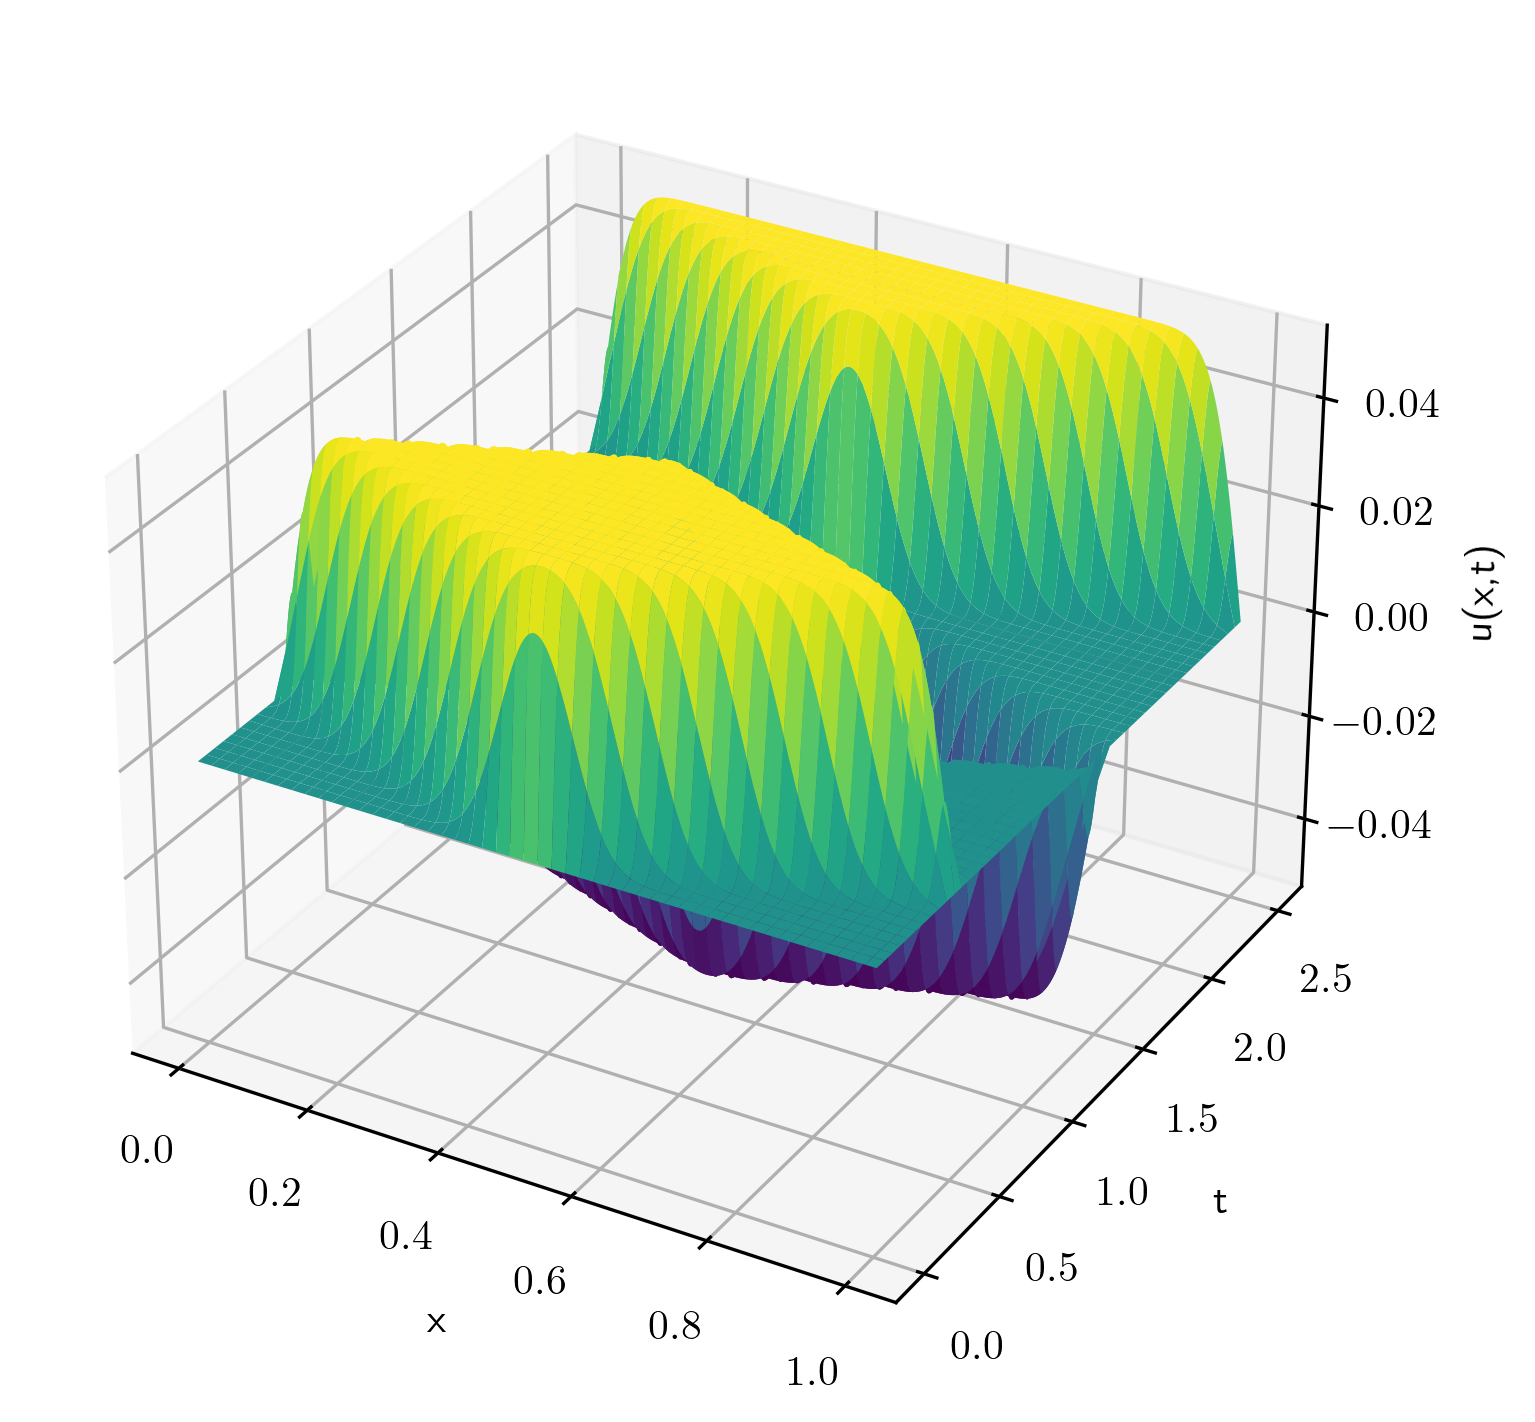

In [114]:

# test the code with a sample initial condition and parameters
def g(x):
    return np.exp(-300*((x - 0.5)**2))

c  = 1
dt = 0.0001
dx = 0.0005

startt = 0
startx = 0
endt   = 2.5
endx   = 1

U = solve_wave_eqn_v1(c = c,
                   g = g,
                   startt = startt,
                   startx = startx,
                   endt   = endt, 
                   endx   = endx,
                   dt     = dt, 
                   dx     = dx)




***here we add some plots to show the equations we arrived to, in a more intuitive visual way:***

$$U_j^{n+1} = 2U_j^n - U_j^{n-1} + \frac{c^2(\Delta t)^2}{(\Delta x)^2}(U_{j-1}^n - 2U_j^n + U_{j+1}^n)$$

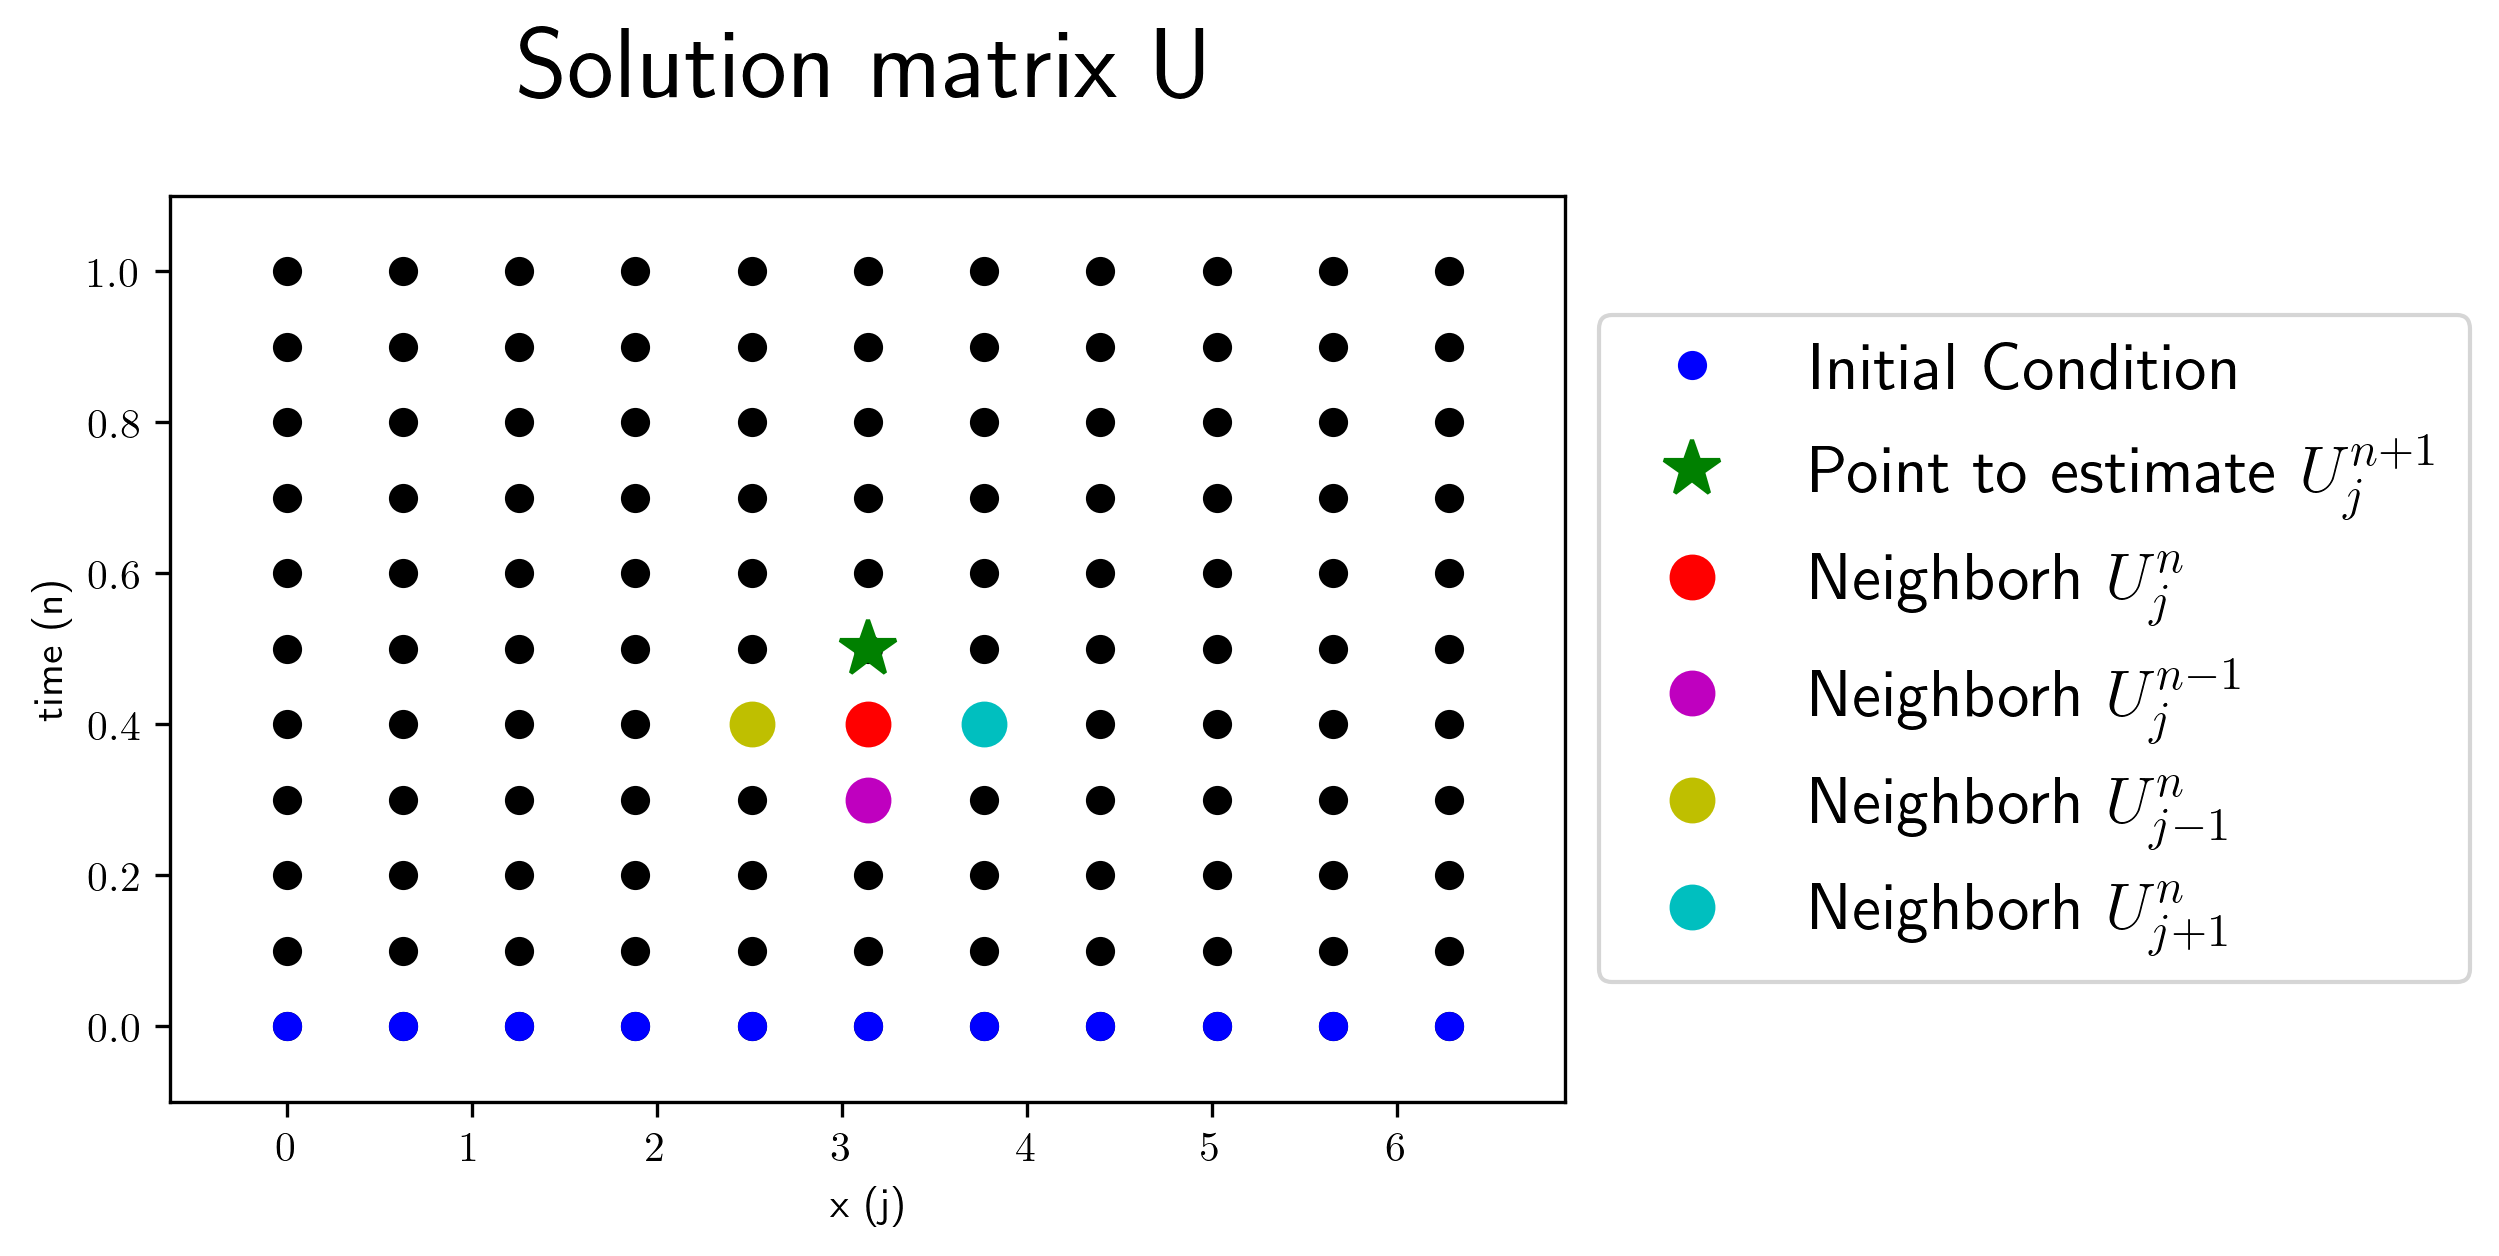

In [94]:
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300


N=10
Nt=10

h=2*np.pi/N
k=1/Nt
r=k/(h*h)
time_steps=10
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,2*np.pi+h/2,h)


X, Y = np.meshgrid(x, time)
n = 4  #time position 
j = 5  #space position

fig = plt.figure()
plt.plot(X,Y,'ko');
plt.plot(x, 0*x,'bo', label='Initial Condition');

plt.plot(x[j], time[n+1], 'g*', label='Point to estimate $\displaystyle U^{n+1}_{j}$', markersize=14);
plt.plot(x[j], time[n],   'ro', label='Neighborh $\displaystyle U^{n}_{j}$',           markersize=10);
plt.plot(x[j], time[n-1], 'mo', label='Neighborh $\displaystyle U^{n-1}_{j}$',         markersize=10);

plt.plot(x[j-1], time[n], 'yo', label='Neighborh $\displaystyle U^{n}_{j-1}$', markersize=10);
plt.plot(x[j+1], time[n], 'co', label='Neighborh $\displaystyle U^{n}_{j+1}$', markersize=10);


plt.xlim((-h,2*np.pi+h))
plt.ylim((-k,max(time)+k))
plt.xlabel('x (j)')
plt.ylabel('time (n)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.title(r'Solution matrix U',fontsize=24,y=1.08)
plt.show();

***here we add some plots to show the equations we arrived to, in a more intuitive visual way:***

$$U_j^{n+1} = 2U_j^n - U_j^{n-1} + \frac{c^2(\Delta t)^2}{(\Delta x)^2}(U_{j-1}^n - 2U_j^n + U_{j+1}^n)$$

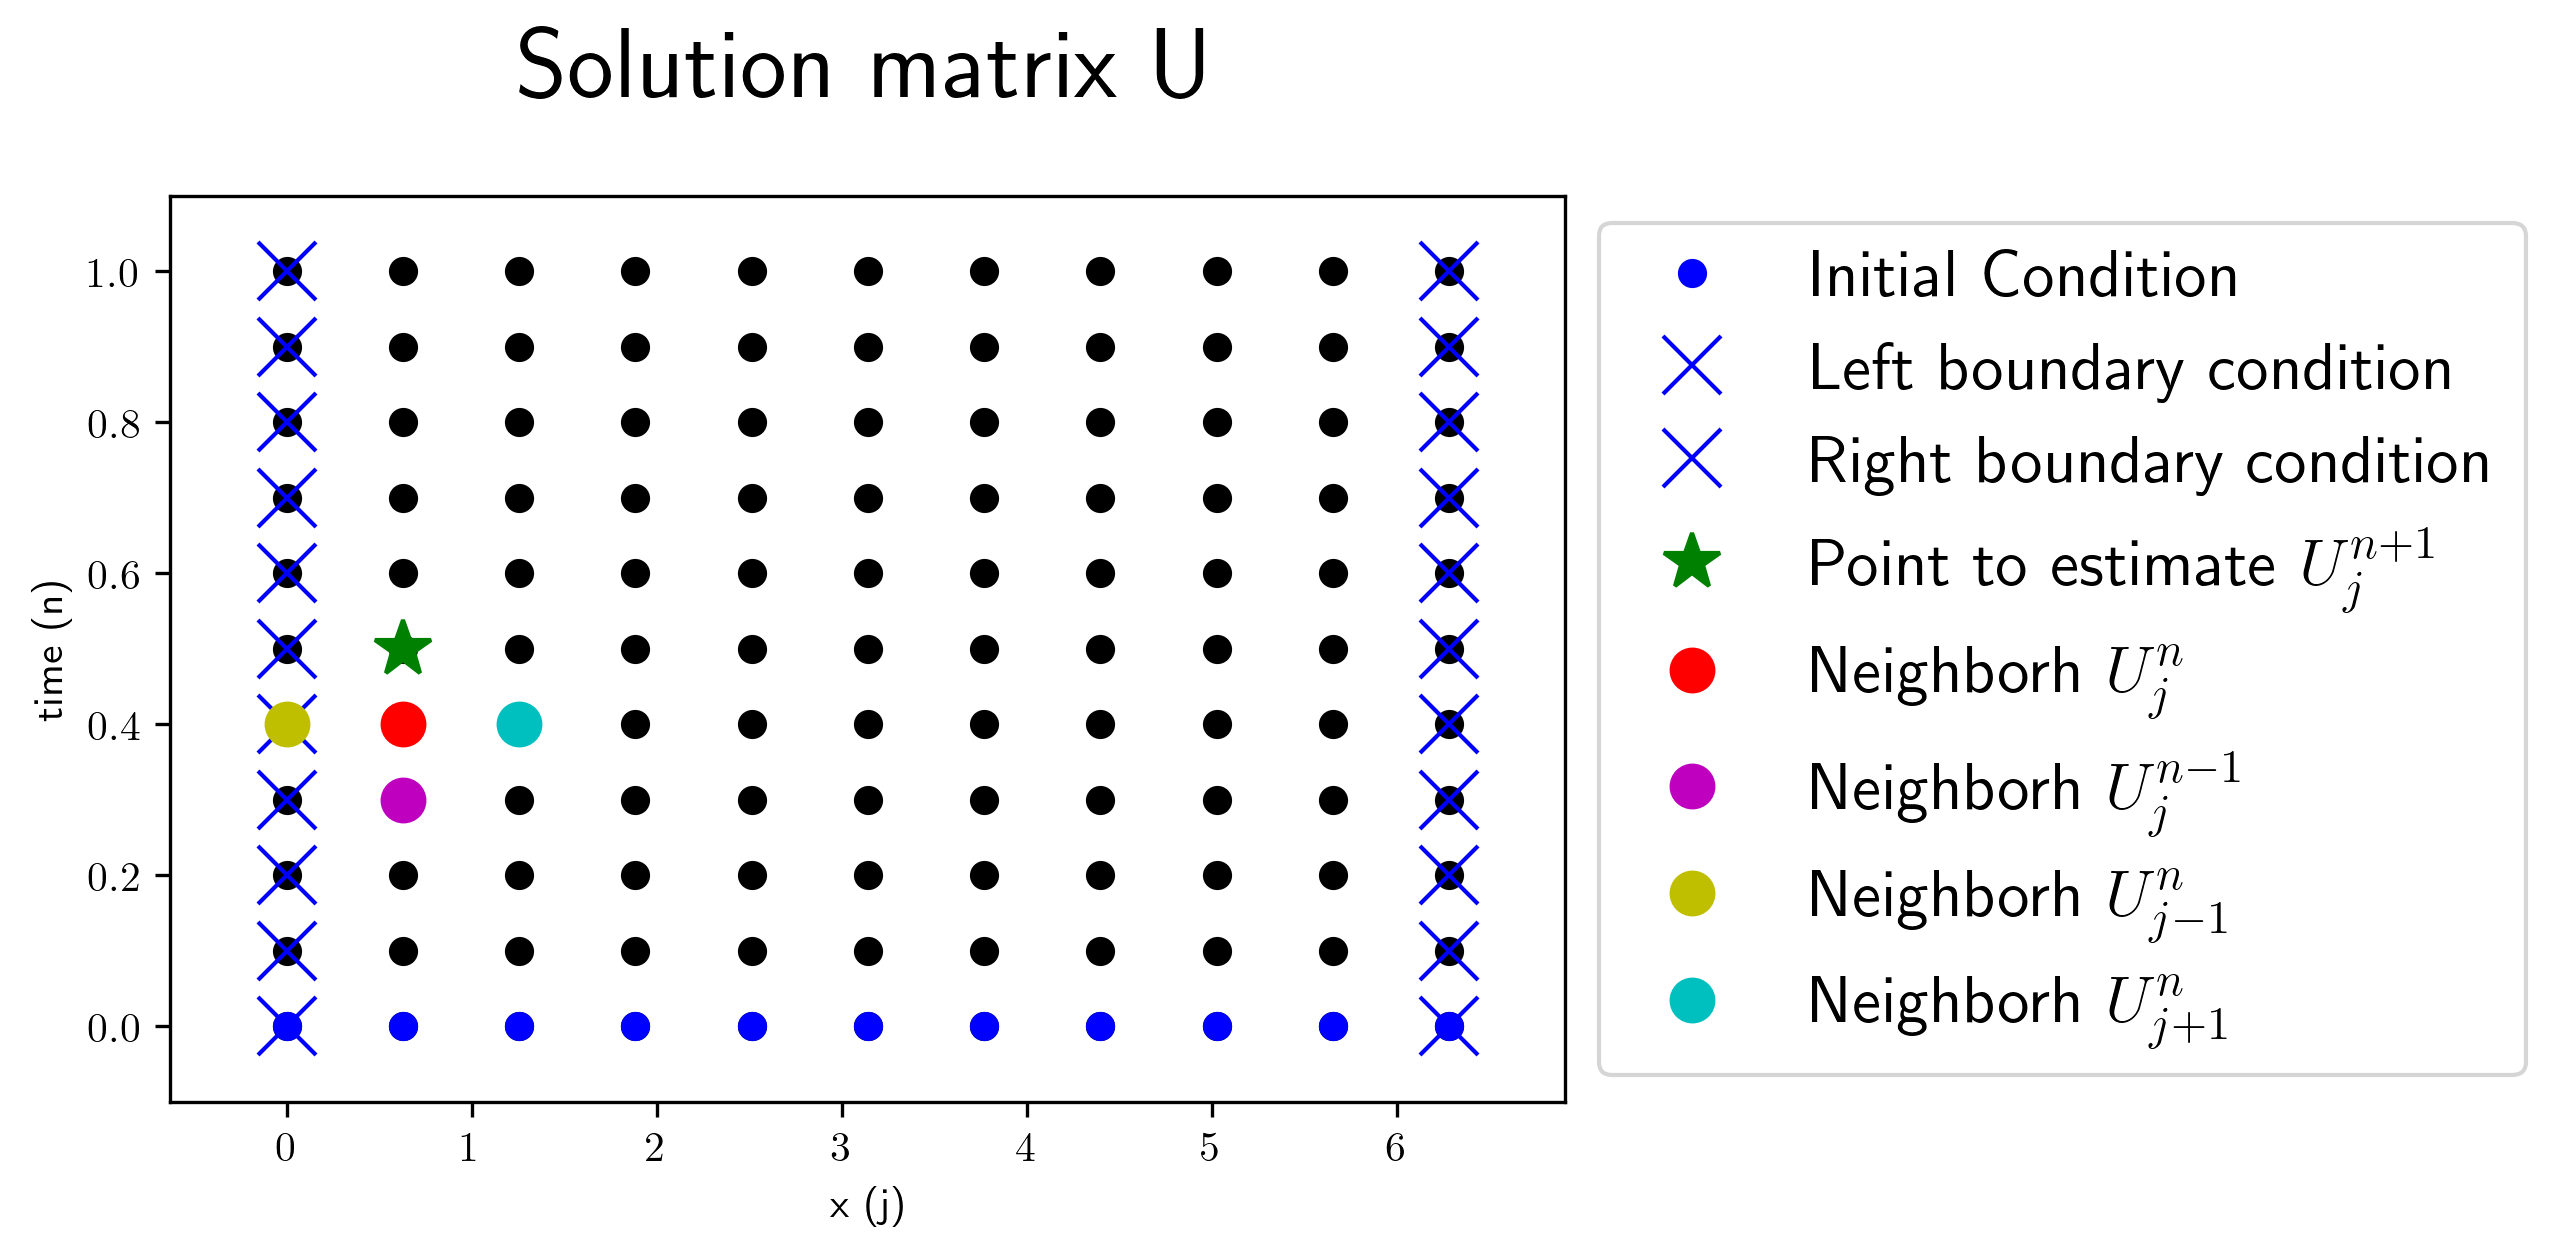

In [112]:
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300


N=10
Nt=10

h=2*np.pi/N
k=1/Nt
r=k/(h*h)
time_steps=10
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,2*np.pi+h/2,h)


X, Y = np.meshgrid(x, time)

fig = plt.figure()
plt.plot(X,Y,'ko');
plt.plot(x, 0*x,'bo', label='Initial Condition');
plt.plot(0*x, time,'bx', label='Left boundary condition', markersize=14);
plt.plot(len(time)*[x[-1],], time,'bx', label='Right boundary condition', markersize=14);


n = 4  #time position 
j = 1  #space position

plt.plot(x[j], time[n+1], 'g*', label='Point to estimate $\displaystyle U^{n+1}_{j}$', markersize=14);
plt.plot(x[j], time[n],   'ro', label='Neighborh $\displaystyle U^{n}_{j}$',           markersize=10);
plt.plot(x[j], time[n-1], 'mo', label='Neighborh $\displaystyle U^{n-1}_{j}$',         markersize=10);

plt.plot(x[j-1], time[n], 'yo', label='Neighborh $\displaystyle U^{n}_{j-1}$', markersize=10);
plt.plot(x[j+1], time[n], 'co', label='Neighborh $\displaystyle U^{n}_{j+1}$', markersize=10);


plt.xlim((-h,2*np.pi+h))
plt.ylim((-k,max(time)+k))
plt.xlabel('x (j)')
plt.ylabel('time (n)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.title(r'Solution matrix U',fontsize=24,y=1.08)
plt.show();

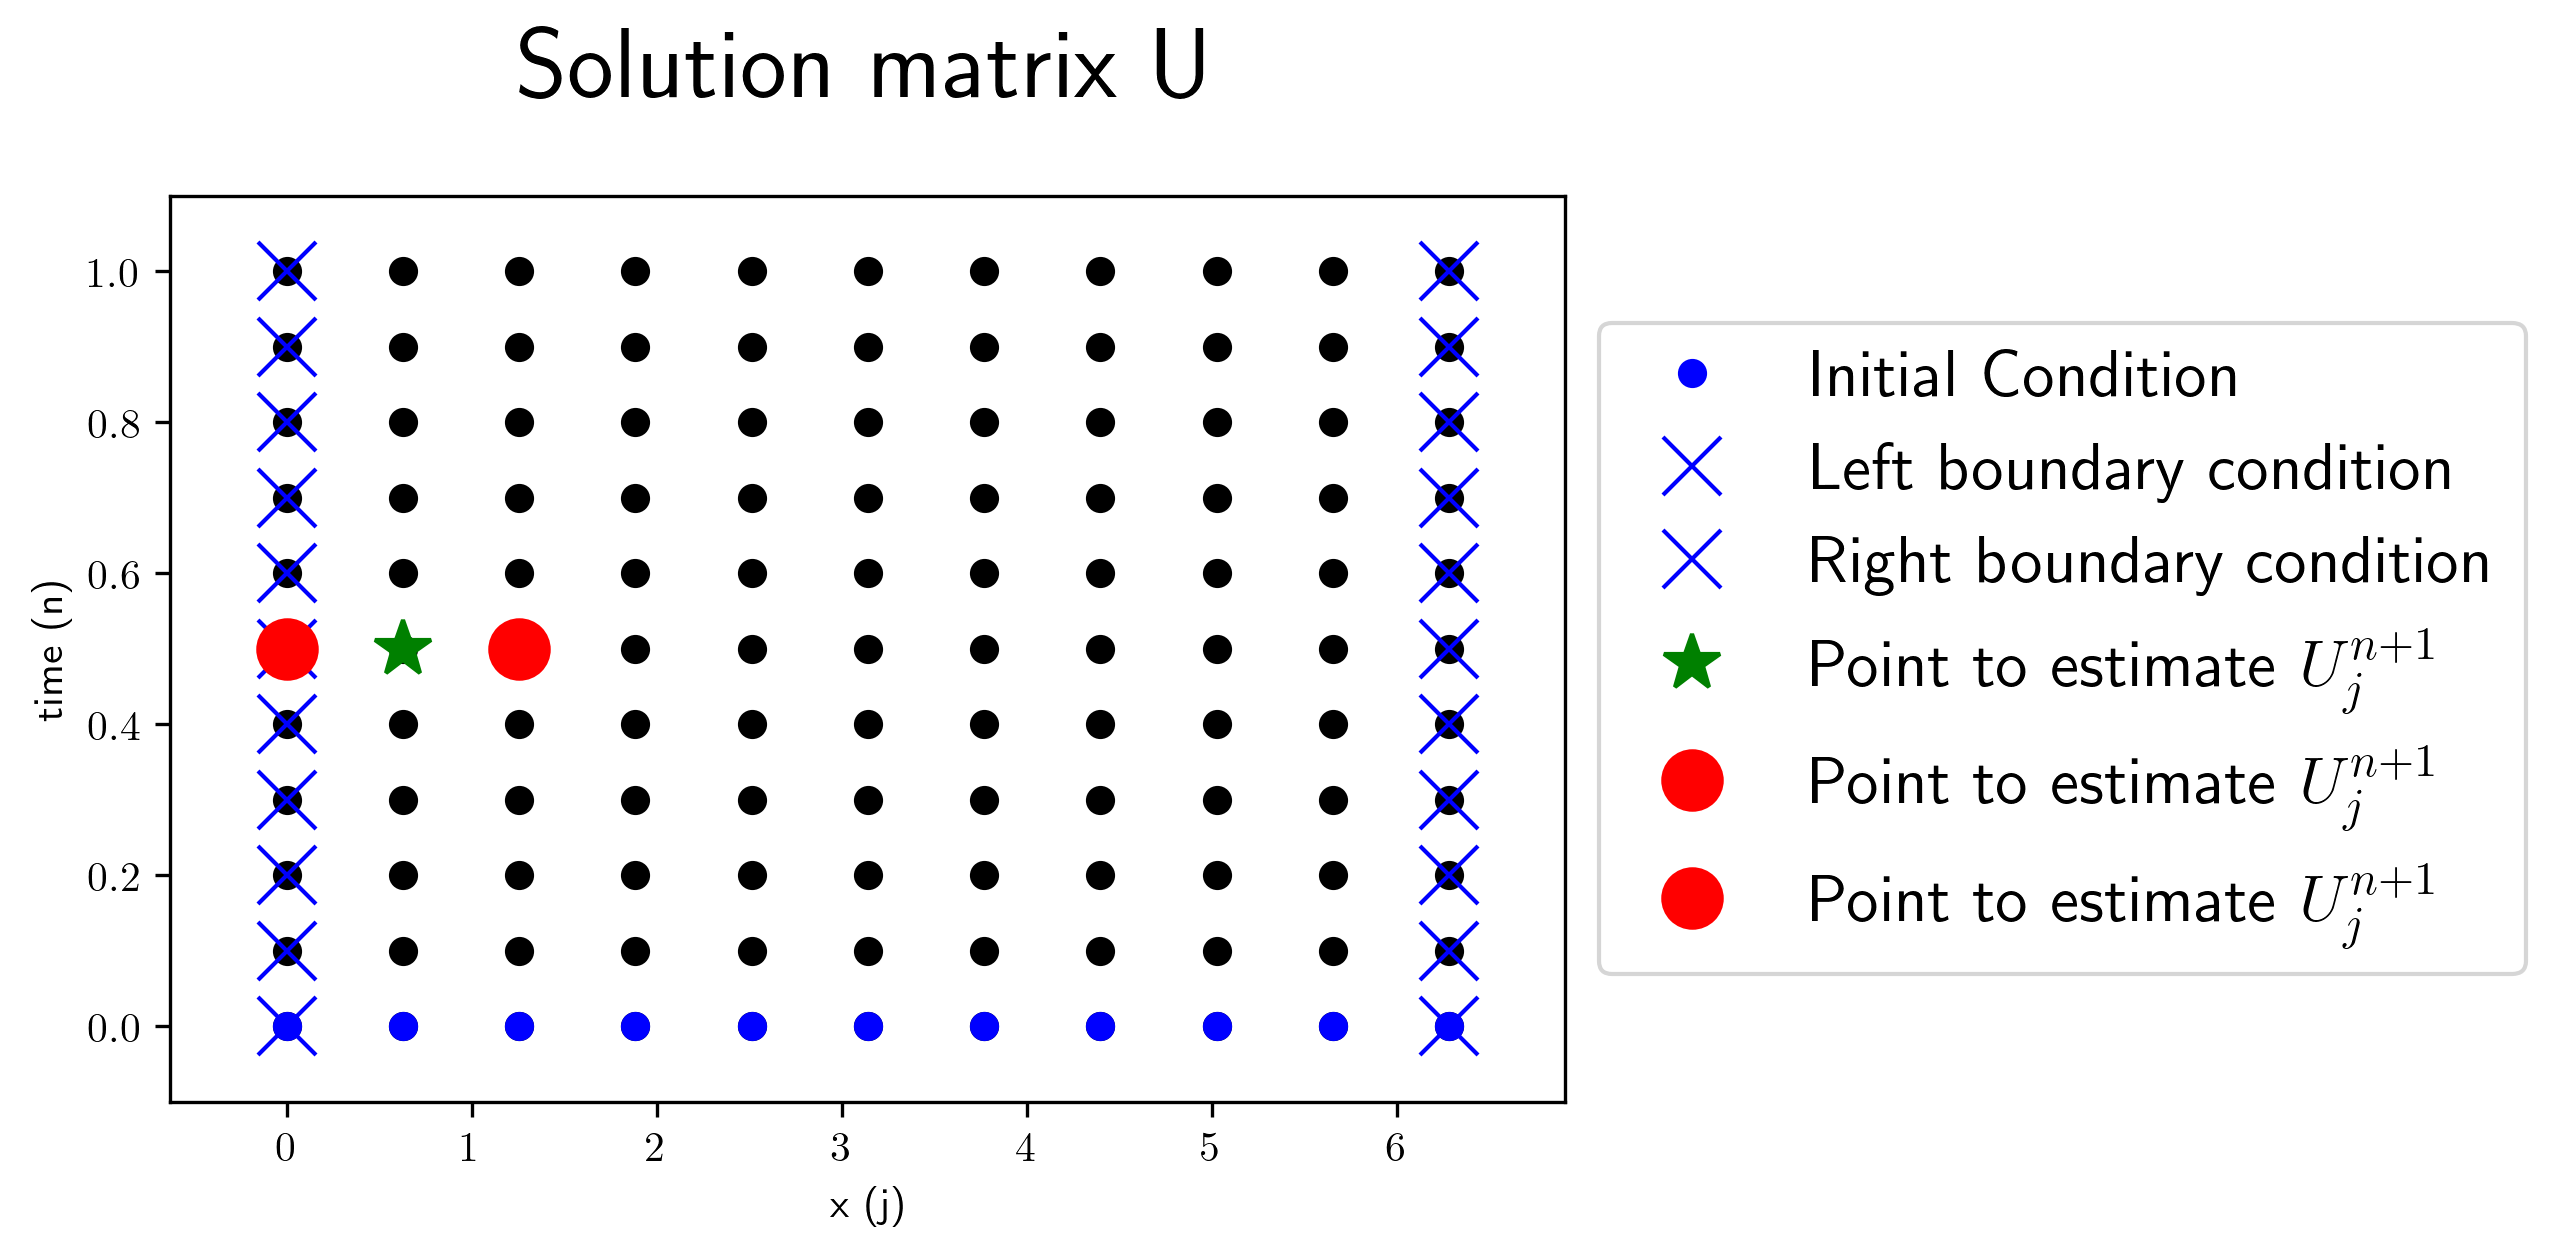

In [106]:
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 300


N=10
Nt=10

h=2*np.pi/N
k=1/Nt
r=k/(h*h)
time_steps=10
time=np.arange(0,(time_steps+.5)*k,k)
x=np.arange(0,2*np.pi+h/2,h)


X, Y = np.meshgrid(x, time)

fig = plt.figure()
plt.plot(X,Y,'ko');
plt.plot(x, 0*x,'bo', label='Initial Condition');
plt.plot(0*x, time,'bx', label='Left boundary condition', markersize=14);
plt.plot(len(time)*[x[-1],], time,'bx', label='Right boundary condition', markersize=14);


n = 4  #time position 
j = 1  #space position

plt.plot(x[j],   time[n+1], 'g*', label='Point to estimate $\displaystyle U^{n+1}_{j}$', markersize=14);
plt.plot(x[j+1], time[n+1], 'ro', label='Point to estimate $\displaystyle U^{n+1}_{j}$', markersize=14);
plt.plot(x[j-1], time[n+1], 'ro', label='Point to estimate $\displaystyle U^{n+1}_{j}$', markersize=14);
plt.plot(x[j-1], time[n+1], 'ro', label='Point to estimate $\displaystyle U^{n+1}_{j}$', markersize=14);


plt.xlim((-h,2*np.pi+h))
plt.ylim((-k,max(time)+k))
plt.xlabel('x (j)')
plt.ylabel('time (n)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
plt.title(r'Solution matrix U',fontsize=24,y=1.08)
plt.show();